In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
#import pandas_bokeh
from bokeh.plotting import figure, save, ColumnDataSource

#POST-COVID

counties = gpd.read_file('WA-counties.json', low_memory=False)
df = pd.read_csv('Report_Card_Enrollment_Post-Covid.csv')
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace('-', '')
racial_demo = df.groupby('County')[['All_Students', 'American_Indian_Alaskan_Native',
                           'Asian', 'Black_African_American', 
                           'Hispanic_Latino_of_any_races', 
                           'Native_Hawaiian_Other_Pacific_Islander',
                            'White']].sum()
demographics = df.columns
racial_demo['American_Indian_Percentage'] = 100 * racial_demo.American_Indian_Alaskan_Native / racial_demo.All_Students
racial_demo['Asian_Percentage'] = 100 * racial_demo.Asian / racial_demo.All_Students
racial_demo['Black_African_American_Percentage'] = 100 * racial_demo.Black_African_American / racial_demo.All_Students
racial_demo['Hispanic_Latino_of_any_races_Percentage'] = 100 * racial_demo.Hispanic_Latino_of_any_races / racial_demo.All_Students
racial_demo['Native_Hawaiian_Other_Pacific_Islander_Percentage'] = 100 * racial_demo.Native_Hawaiian_Other_Pacific_Islander / racial_demo.All_Students
racial_demo['White_Percentage'] = 100 * racial_demo.White / racial_demo.All_Students
racial_demo_map = counties.merge(racial_demo, left_on='NAME', right_on='County')

counties.plot_bokeh(simplify_shapes=10000)

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-33-f251f213de30>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '')
<ipython-input-33-f251f213de30>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '')


Figure ( id = '2288', …) above = [], align = 'start', aspect_ratio = None, aspect_scale = 1, background = None, background_fill_alpha = 1.0, background_fill_color = '#ffffff', below = [MercatorAxis(id='2299', ...)], border_fill_alpha = 1.0, border_fill_color = '#ffffff', center = [Grid(id='2306', ...), Grid(id='2314', ...), Legend(id='2352', ...)], css_classes = [], disabled = False, extra_x_ranges = {}, extra_x_scales = {}, extra_y_ranges = {}, extra_y_scales = {}, frame_height = None, frame_width = None, height = 400, height_policy = 'auto', hidpi = True, inner_height = 0, inner_width = 0, js_event_callbacks = {}, js_property_callbacks = {}, left = [MercatorAxis(id='2307', ...)], lod_factor = 10, lod_interval = 300, lod_threshold = 2000, lod_timeout = 500, margin = (0, 0, 0, 0), match_aspect = True, max_height = None, max_width = None, min_border = 5, min_border_bottom = None, min_border_left = None, min_border_right = None, min_border_top = None, min_height = None, min_width = None, name = None, outer_height = 0, outer_width = 0, outline_line_alpha = 1.0, outline_line_cap = 'butt', outline_line_color = '#e5e5e5', outline_line_dash = [], outline_line_dash_offset = 0, outline_line_join = 'bevel', outline_line_width = 1, output_backend = 'webgl', renderers = [TileRenderer(id='2331', ...), GlyphRenderer(id='2340', ...)], reset_policy = 'standard', right = [], sizing_mode = None, subscribed_events = [], syncable = True, tags = [], title = Title(id='2289', ...), title_location = 'above', toolbar = Toolbar(id='2322', ...), toolbar_location = 'right', toolbar_sticky = True, visible = True, width = 600, width_policy = 'auto', x_range = DataRange1d(id='2291', ...), x_scale = LinearScale(id='2295', ...), y_range = DataRange1d(id='2293', ...), y_scale = LinearScale(id='2297', ...))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


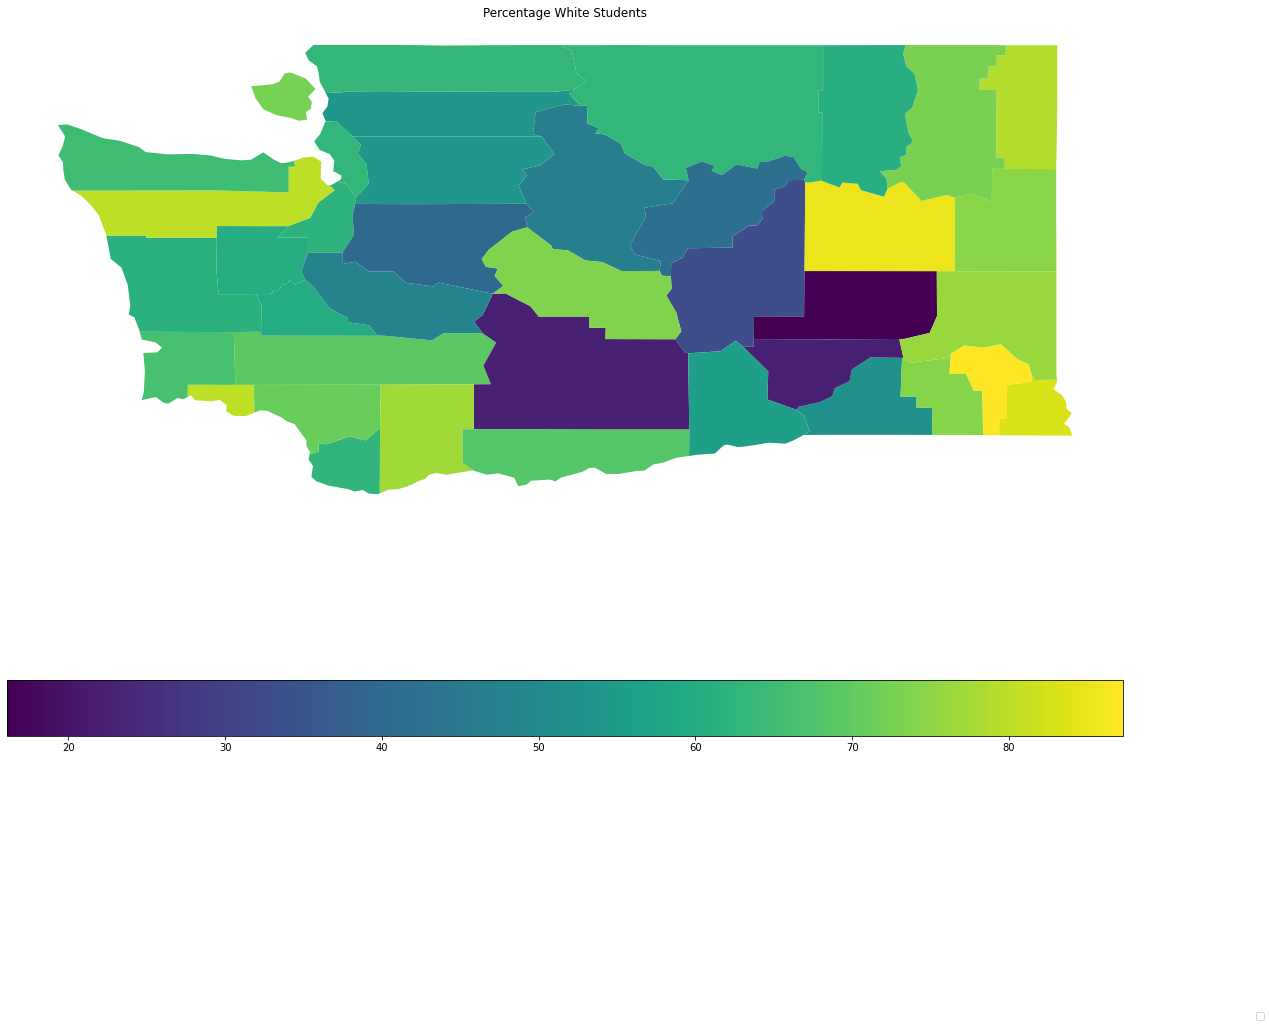

In [38]:
fig1, ax1 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax1)
racial_demo_map.plot(column='American_Indian_Percentage', legend=True, ax=ax1,
                     legend_kwds={'orientation': "horizontal"})
plt.title('Percentage American Indian / Alaskan Native Students')
plt.axis('off')
fig1.legend(loc='lower right')
plt.savefig('perNativeAmerican.png', bbox_inches='tight')

fig2, ax2 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax2)
racial_demo_map.plot(column='Asian_Percentage', legend=True, ax=ax2,
                     legend_kwds={'orientation': "horizontal"})
plt.axis('off')
fig2.legend(loc='lower right')
plt.title('Percentage Asian Students')
plt.savefig('perAsian.png', bbox_inches='tight')

fig3, ax3 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax3)
racial_demo_map.plot(column='Black_African_American_Percentage', legend=True, ax=ax3,
                     legend_kwds={'orientation': "horizontal"})
plt.axis('off')
fig3.legend(loc='lower right')
plt.title('Percentage Black Students')
plt.savefig('perAfricanAmerican.png', bbox_inches='tight')

fig4, ax4 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax3)
racial_demo_map.plot(column='Hispanic_Latino_of_any_races_Percentage', legend=True, ax=ax4,
                     legend_kwds={'orientation': "horizontal"})
plt.axis('off')
fig4.legend(loc='lower right')
plt.title('Percentage Hispanic Latino Students')
plt.savefig('perHispanic.png', bbox_inches='tight')

fig5, ax5 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax3)
racial_demo_map.plot(column='Native_Hawaiian_Other_Pacific_Islander_Percentage', legend=True, ax=ax5,
                     legend_kwds={'orientation': "horizontal"})
plt.axis('off')
fig5.legend(loc='lower right')
plt.title('Percentage Pacific Islander Students')
plt.savefig('perPacific.png', bbox_inches='tight')

fig6, ax6 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax3)
racial_demo_map.plot(column='White_Percentage', legend=True, ax=ax6,
                     legend_kwds={'orientation': "horizontal"})
plt.axis('off')
fig6.legend(loc='lower right')
plt.title('Percentage White Students')
plt.savefig('perWhite.png', bbox_inches='tight')

In [0]:
def convert_GeoPandas_to_Bokeh_format(gdf):
    """
    Function to convert a GeoPandas GeoDataFrame to a Bokeh
    ColumnDataSource object.
    
    :param: (GeoDataFrame) gdf: GeoPandas GeoDataFrame with polygon(s) under
                                the column name 'geometry.'
                                
    :return: ColumnDataSource for Bokeh.
    """
    gdf_new = gdf.drop('geometry', axis=1).copy()
    gdf_new['x'] = gdf.apply(getGeometryCoords, 
                             geom='geometry', 
                             coord_type='x', 
                             shape_type='polygon', 
                             axis=1)
    
    gdf_new['y'] = gdf.apply(getGeometryCoords, 
                             geom='geometry', 
                             coord_type='y', 
                             shape_type='polygon', 
                             axis=1)
    
    return ColumnDataSource(gdf_new)

p = figure(title='Percentage American Indian/Alaskan Native')

In [36]:
poverty_stats = df.groupby('County')[['All_Students', 'LowIncome', 'Homeless']].sum()
poverty_stats['Percent_LowIncome'] = 100 * poverty_stats.LowIncome / poverty_stats.All_Students
poverty_stats['Percent_Homeless'] = 100 * poverty_stats.Homeless / poverty_stats.All_Students
poverty_stats_map = counties.merge(poverty_stats, left_on='NAME', right_on='County')

fig1, ax1 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax1)
poverty_stats_map.plot(column='Percent_LowIncome', legend=True, ax=ax1, 
                       legend_kwds={'orientation': "horizontal"})
plt.title('Percentage of Students in Low-Income Households Post-Covid')
plt.axis('off')
fig1.legend(loc='lower right', prop={'size': 1})
plt.savefig('postcovidLowIncome.png', bbox_inches='tight')

fig2, ax2 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax2)
poverty_stats_map.plot(column='Percent_Homeless', legend=True, ax=ax2,
                       legend_kwds={'orientation': "horizontal"})
plt.title('Percentage of Students Homeless Post-Covid')
plt.axis('off')
fig2.legend(loc='lower right')
plt.savefig('postcovidLowIncome.png', bbox_inches='tight')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


No handles with labels found to put in legend.


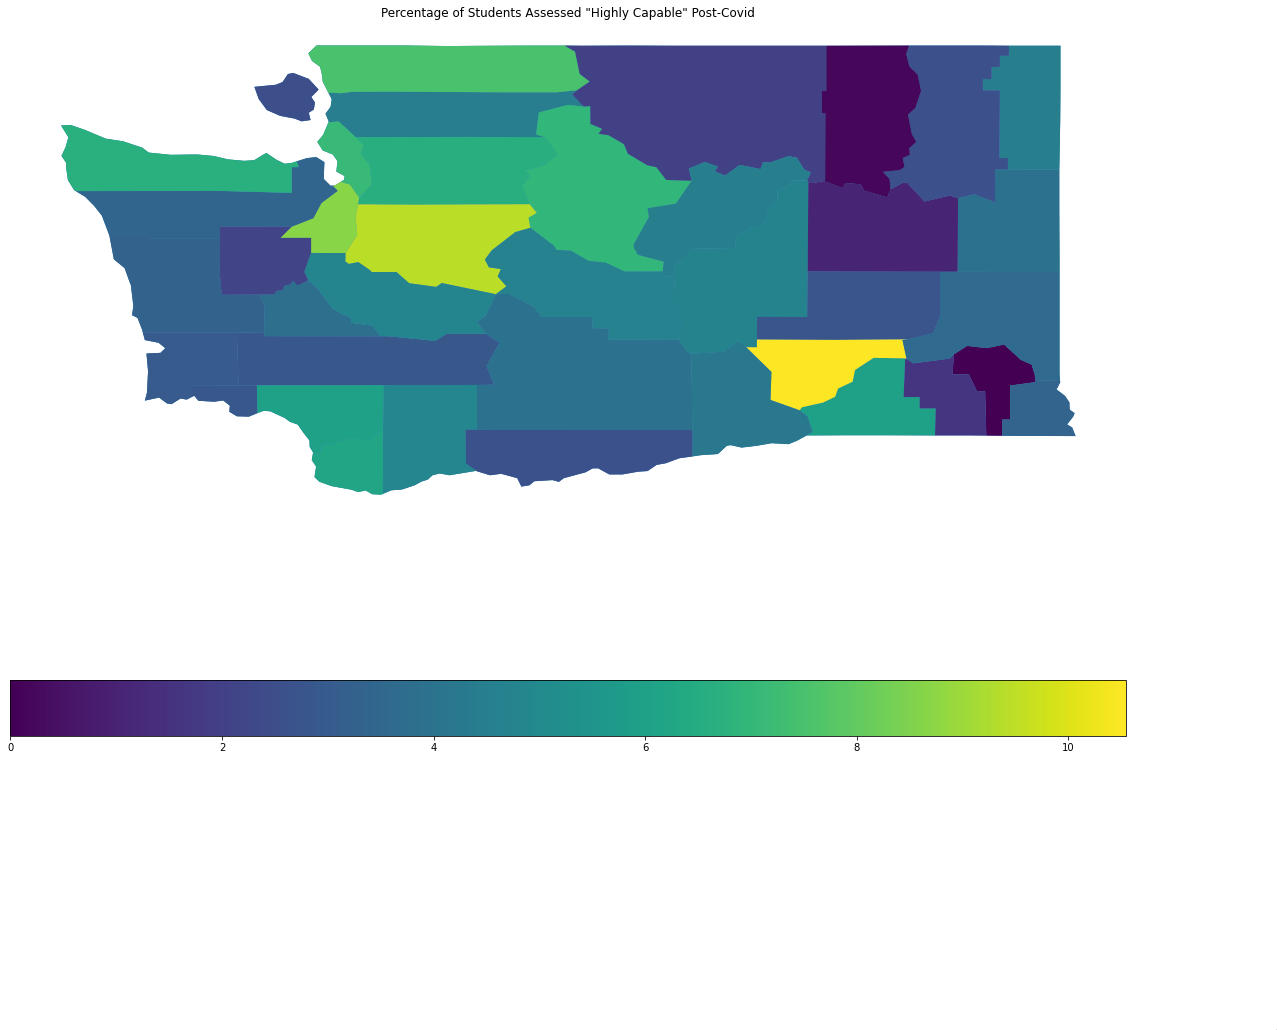

In [41]:
assesments_stats = df.groupby('County')[['All_Students', 'Highly_Capable', 'NonHighly_Capable']].sum()
assesments_stats['Percent_Highly_Capable'] = 100 * assesments_stats.Highly_Capable / assesments_stats.All_Students
assesments_stats_map = counties.merge(assesments_stats, left_on='NAME', right_on='County')

fig1, ax1 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax1)
assesments_stats_map.plot(column='Percent_Highly_Capable', legend=True, ax=ax1, 
                       legend_kwds={'orientation': "horizontal"})
plt.title('Percentage of Students Assessed \"Highly Capable\" Post-Covid')
plt.axis('off')
fig1.legend(loc='lower right', prop={'size': 1})
plt.savefig('studentAssesmentPostCovid.png', bbox_inches='tight')

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-54-14a89cbe0f60>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '')
<ipython-input-54-14a89cbe0f60>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '')
No handles with labels found to put in legend.


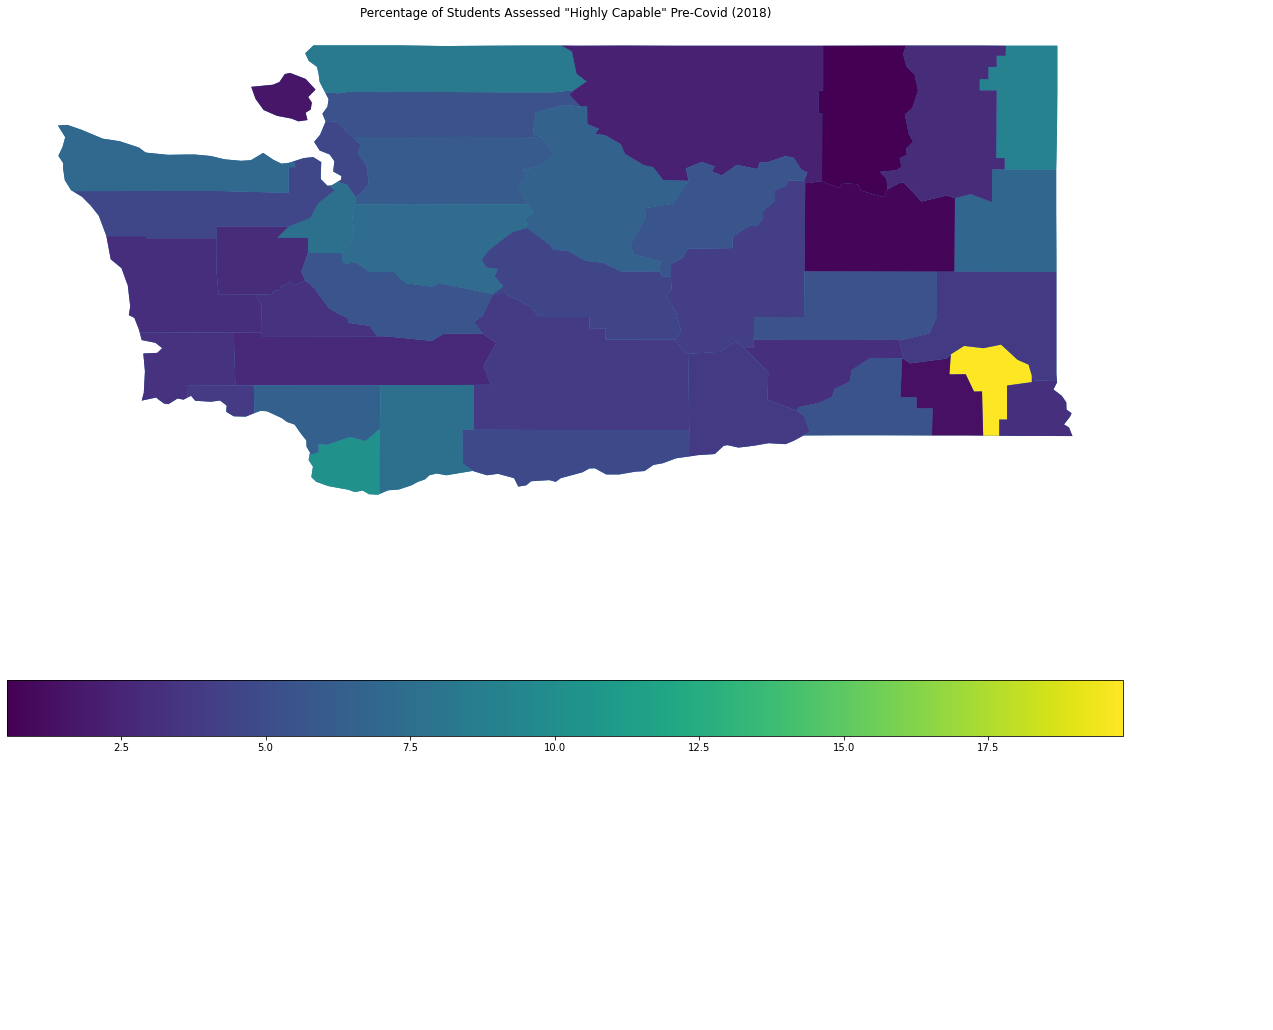

In [54]:
df = pd.read_csv('Report_Card_Enrollment_PreCovid.csv')
df = df[df['County'] != 'Multiple']
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace('-', '')
assesments_stats = df.groupby('County')[['All_Students', 'Highly_Capable', 'NonHighly_Capable']].sum()
assesments_stats['Percent_Highly_Capable'] = 100 * assesments_stats.Highly_Capable / assesments_stats.All_Students
assesments_stats_map = counties.merge(assesments_stats, left_on='NAME', right_on='County')

fig1, ax1 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax1)
assesments_stats_map.plot(column='Percent_Highly_Capable', legend=True, ax=ax1, 
                       legend_kwds={'orientation': "horizontal"})
plt.title('Percentage of Students Assessed \"Highly Capable\" Pre-Covid (2018)')
plt.axis('off')
fig1.legend(loc='lower right', prop={'size': 1})
plt.savefig('studentAssesmentPreCovid.png', bbox_inches='tight')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


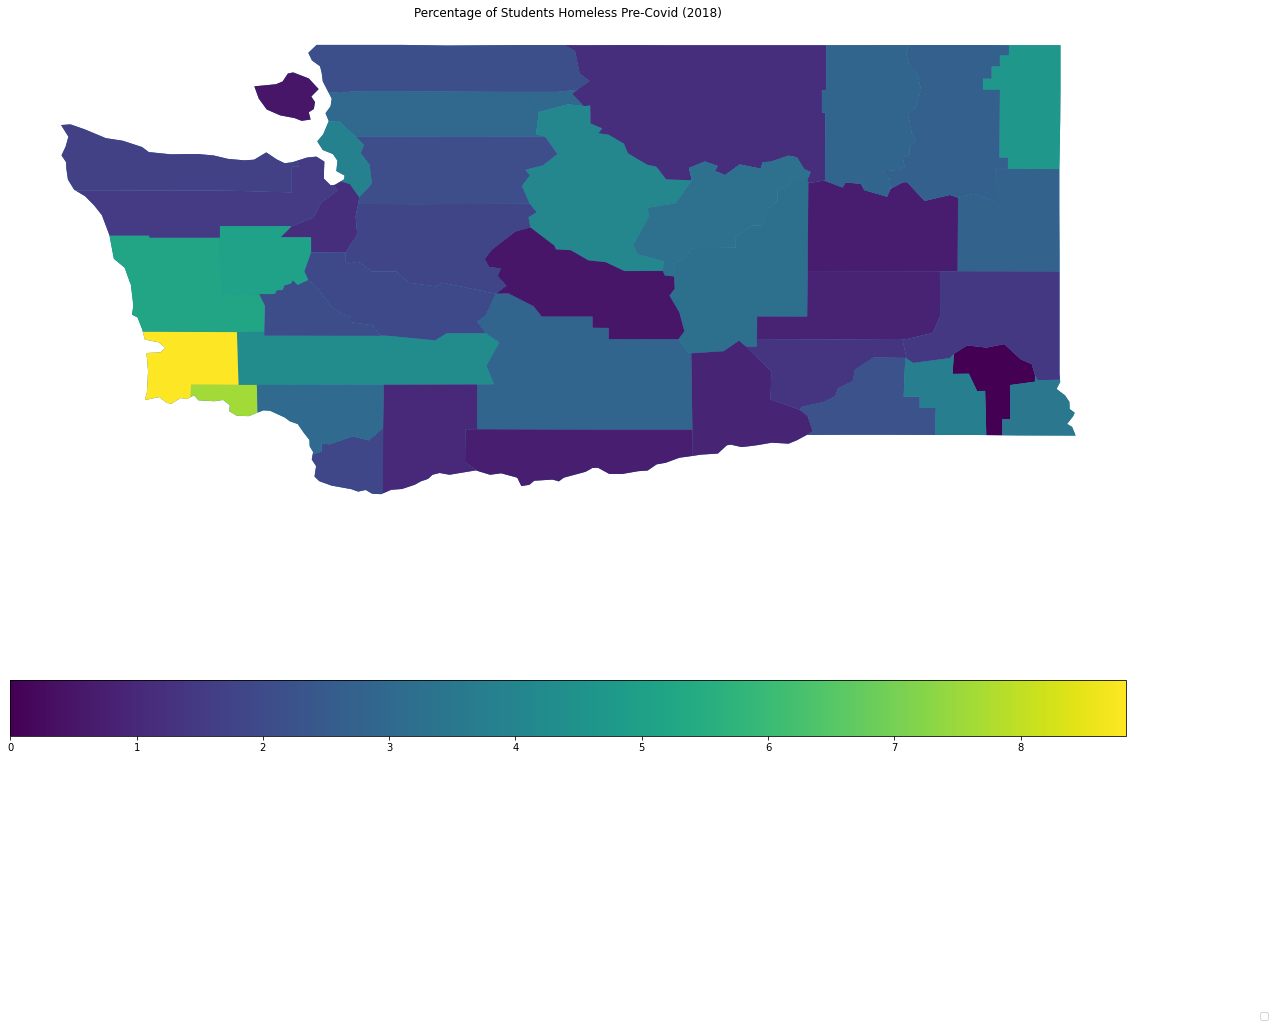

In [56]:
poverty_stats_2018 = df.groupby('County')[['All_Students', 'LowIncome', 'Homeless']].sum()
poverty_stats_2018['Percent_LowIncome'] = 100 * poverty_stats.LowIncome / poverty_stats.All_Students
poverty_stats_2018['Percent_Homeless'] = 100 * poverty_stats.Homeless / poverty_stats.All_Students
poverty_stats_map = counties.merge(poverty_stats_2018, left_on='NAME', right_on='County')

fig1, ax1 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax1)
poverty_stats_map.plot(column='Percent_LowIncome', legend=True, ax=ax1, 
                       legend_kwds={'orientation': "horizontal"})
plt.title('Percentage of Students in Low-Income Households Pre-Covid (2018)')
plt.axis('off')
fig1.legend(loc='lower right', prop={'size': 1})
plt.savefig('precovidLowIncome.png', bbox_inches='tight')

fig2, ax2 = plt.subplots(1, figsize=(20,20))
counties.plot(ax=ax2)
poverty_stats_map.plot(column='Percent_Homeless', legend=True, ax=ax2,
                       legend_kwds={'orientation': "horizontal"})
plt.title('Percentage of Students Homeless Pre-Covid (2018)')
plt.axis('off')
fig2.legend(loc='lower right')
plt.savefig('precovidLowIncome.png', bbox_inches='tight')